In [47]:
# Necssary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
# from mpl_toolkits.basemap import Basemap
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

1) Load in the dataset https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv into a pandas dataframe

In [2]:
df =pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv ')
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


2) Convert default and student to categorical variables.

In [3]:
df_default=pd.get_dummies(df['default'])
df_student=pd.get_dummies(df['student'])
df_concat = pd.concat([df_default,df_student,df[['balance','income']],],axis=1)
df_final = df_concat.drop(df_concat.columns[[0,2]],axis=1)
df_final.columns = ['default',  'student', 'balance','income']
df_final.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color of the outcome of default labeled red if yes and blue if no.

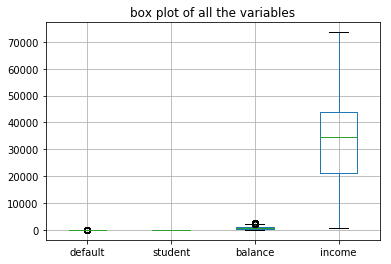

In [4]:
df_final.boxplot()
plt.title('box plot of all the variables')
plt.show()

Text(0.5,1,'scatter plot')

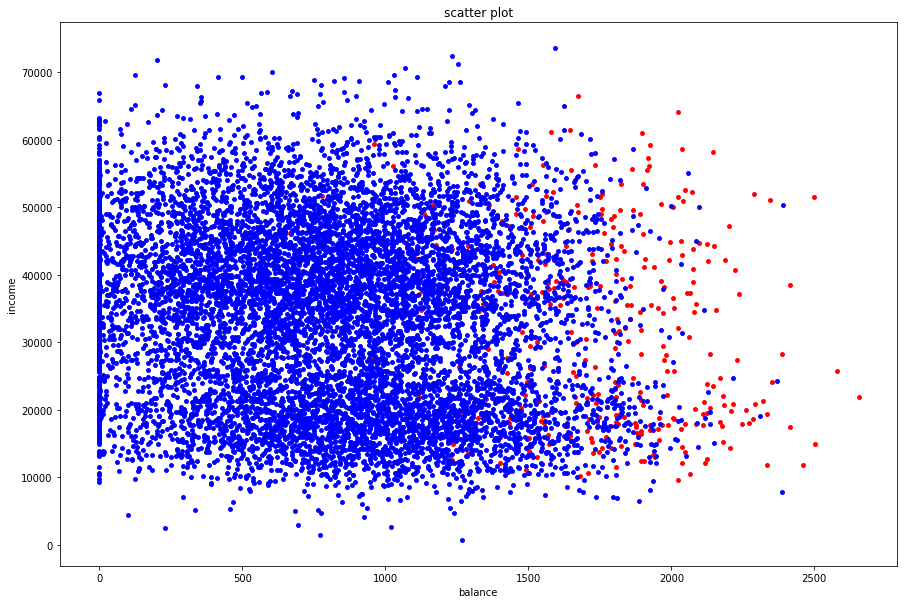

In [5]:
no = df_final.loc[df_final['default']==1,'balance':]
yes = df_final.loc[df_final['default']==0,'balance':]
fig = plt.figure(figsize=(15,10))
plt.scatter(no.balance,no.income,color='r',s=15)
plt.scatter(yes.balance,yes.income,color='b',s=15)
plt.xlabel('balance')
plt.ylabel('income')
plt.title('scatter plot')

As we can see from the boxplot,the income tends to have the biggest variance. And from the scatter plot, we think the two group of data can be discriminate.

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley on the balance and income variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

Text(0.5,1,'scatter plot and decision boundary')

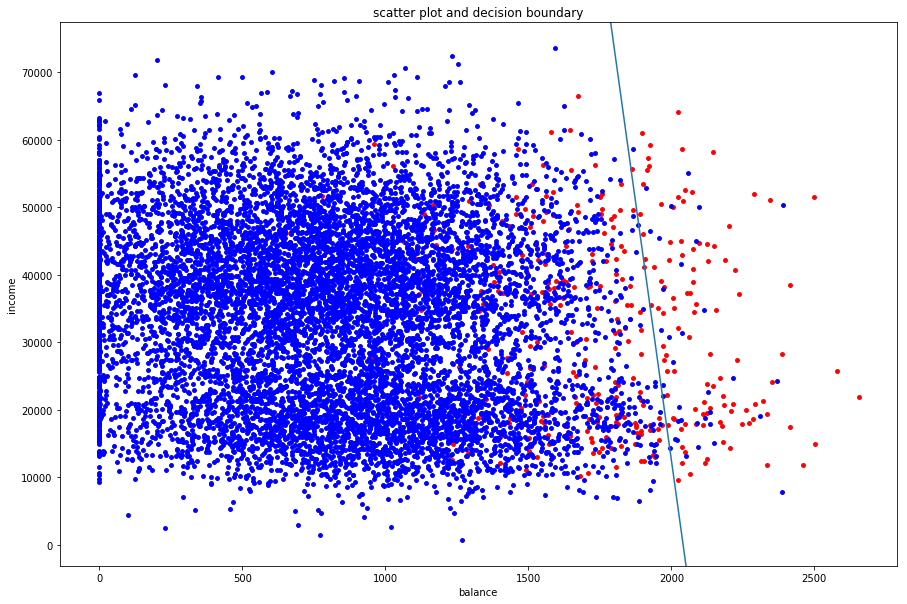

In [6]:
from sklearn.model_selection import train_test_split
X = df_final[['balance','income']]
y = df_final['default']

# Scale columns for regression.
# scaler = StandardScaler()
# X = X.as_matrix().astype(np.float)
# X = scaler.fit_transform(X)

# model training
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
clf = LogisticRegression(penalty='l1')
clf.fit(X_train, y_train)
coef = clf.coef_

#scatter plot and decision boundary
fig = plt.figure(figsize=(15,10))
plt.scatter(no.balance,no.income,color='r',s=15)
plt.scatter(yes.balance,yes.income,color='b',s=15)
plt.xlabel('balance')
plt.ylabel('income')

b = clf.intercept_
w = clf.coef_[0]

axes = plt.gca()
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()

x = np.arange(xmin, xmax, 1)
y = (b + w[0] * x) / -w[1]

plt.plot(x, y)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.title('scatter plot and decision boundary')

Area under the ROC curve : 0.960677


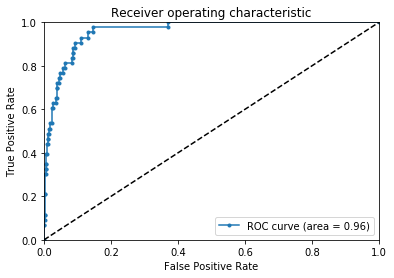

In [7]:
X = df_final[['balance','income']]
y = df_final['default']
# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    fig = plt.figure()
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking of coefficients. How does performance improve with the added variable?

Optimal regularization parameter : 0.0161026202756
Area under the ROC curve : 0.961722


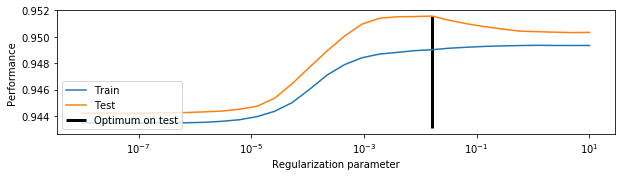

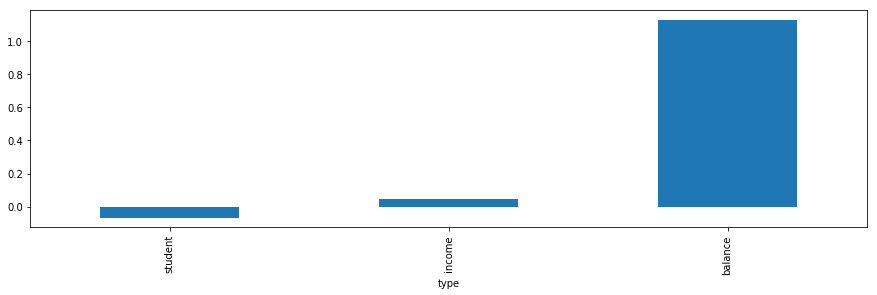

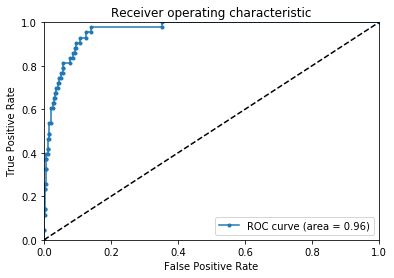

In [16]:
# include the student variable
X = df_final[['student','balance','income']]
y = df_final['default']
# Scale columns for regression.
scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

#use Ridge Regression to find the optimal alpha
alphas = np.logspace(-8,1,30)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet = LogisticRegression(C=alpha,penalty='l2') 
    enet.fit(X_train, y_train)
   
    probas_ = enet.predict_proba(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    train_errors.append(roc_auc)
    
    probas_ = enet.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    test_errors.append(roc_auc)

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)
#plot the optimal regularization parameter
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

# Estimate the coef_ on full data with optimal regularization parameter
coef =  LogisticRegression(C=alpha_optim,penalty='l2').fit(X,y).coef_
# Show coefficient
dfCoeffs = pd.DataFrame({'type':df_final.columns.values[1:], 'coef':coef[0]})
plt.figure(figsize=(15,4))
dfCoeff = dfCoeffs.groupby('type')['coef'].mean()
dfCoeff.sort_values( )
dfCoeff[::-1].plot(kind='bar')

#Auc And Roc
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=alpha_optim,penalty='l2')
generate_ROCplot(fpr,tpr,'LR',roc_auc)

plt.show()

As we can see from the figure:

1.the optimal regularization parameter is 0.016
2.To see the rank of the coefficient, we can find that the balance feature accounts for more than the student and income.
3.From ROC curve, we can find after adding the student variable, AOC value increase from 0.960 to 0.962, slightly increase than before

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

[   0    1    2 ..., 9997 9998 9999]
Area under the ROC curve : 0.950123


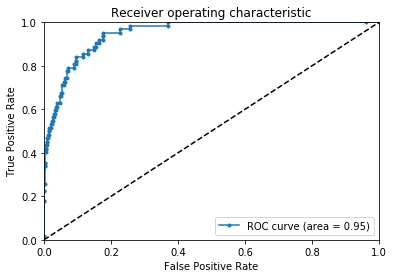

[   0    1    2 ..., 9995 9998 9999]
Area under the ROC curve : 0.946817


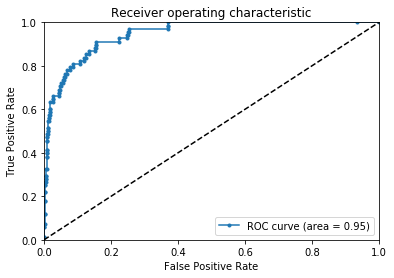

[   0    2    3 ..., 9996 9997 9999]
Area under the ROC curve : 0.960363


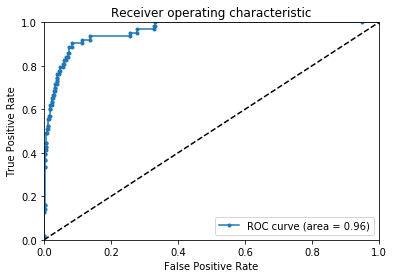

[   1    2    5 ..., 9997 9998 9999]
Area under the ROC curve : 0.937348


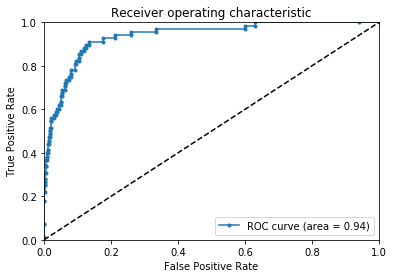

[   0    1    3 ..., 9996 9997 9998]
Area under the ROC curve : 0.947492


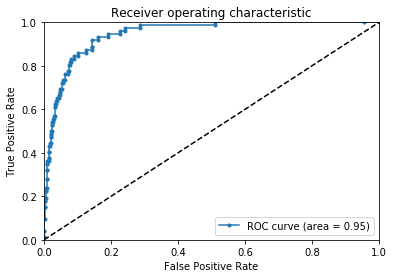

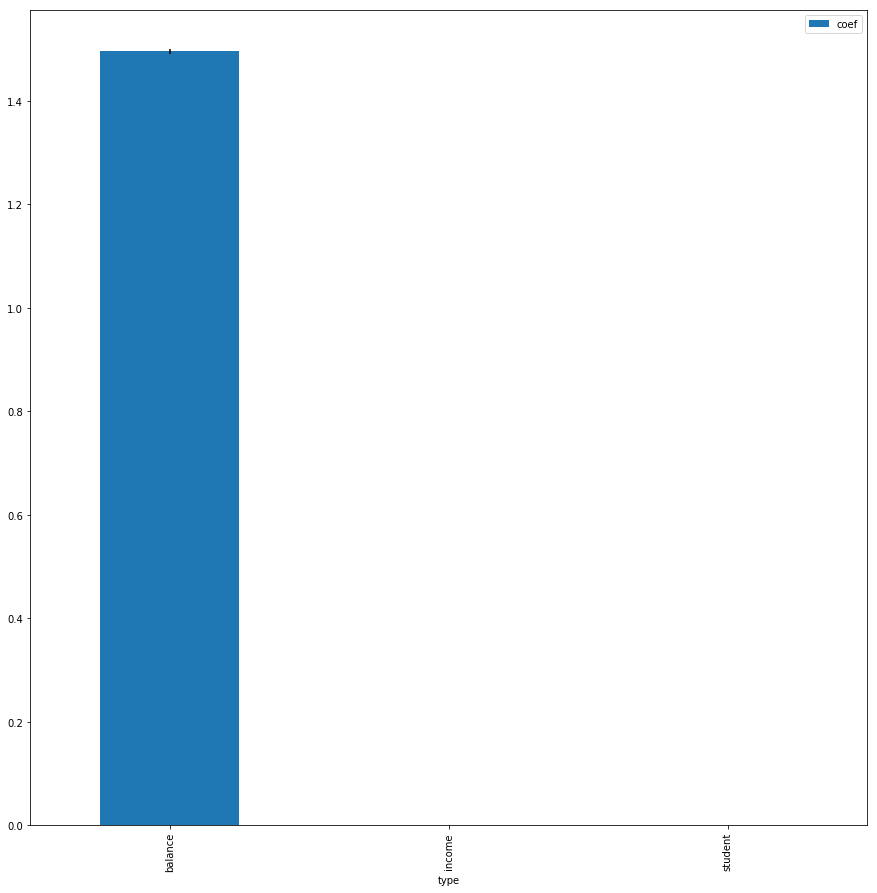

In [36]:
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(X),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        print (train_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:,1])
        roc_auc = auc(fpr, tpr)
        print ("Area under the ROC curve : %f" % roc_auc)
        fig = plt.figure()
        plt.clf()
        plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()
        



    return coeffs
X = df_final[['student','balance','income']]
y = df_final['default']
scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)
coeffs=run_cv_coeffs(X,y,LogisticRegression,C=alpha_optim,penalty='l1')

def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][0][i] + coeffs[1][0][i] + coeffs[2][0][i] + coeffs[3][0][i] + coeffs[4][0][i])/5 for i in range(0,3)]
    coeffs_std = [np.std([coeffs[0][0][i],coeffs[1][0][i],coeffs[2][0][i],coeffs[3][0][i],coeffs[4][0][i]]) for i in range(0,3)]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

dfCoeffs = pd.DataFrame({'type':df_final.columns.values[1:], 'coef':coeffs_avg, 'std':coeffs_std})
# dfCoeffs=dfCoeffs.drop(dfCoeffs.index[3])

plt.figure(figsize=(15,15))

dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values

dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))

Using 5 folds cross validation we can find that the variance for our coefficient is small,and the AUC value doesn't change a lot around 0.95. so our model is robust.

In [59]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy.random as nprnd
import random
import seaborn
from PIL import Image, ImageFilter
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import pydotplus
from __future__ import print_function

import os
import subprocess
import pandas as pd
import numpy as np
from PIL import Image, ImageFilter
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Digraph
import pydotplus
from IPython.display import Image

In [60]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

Automatically created module for IPython interactive environment


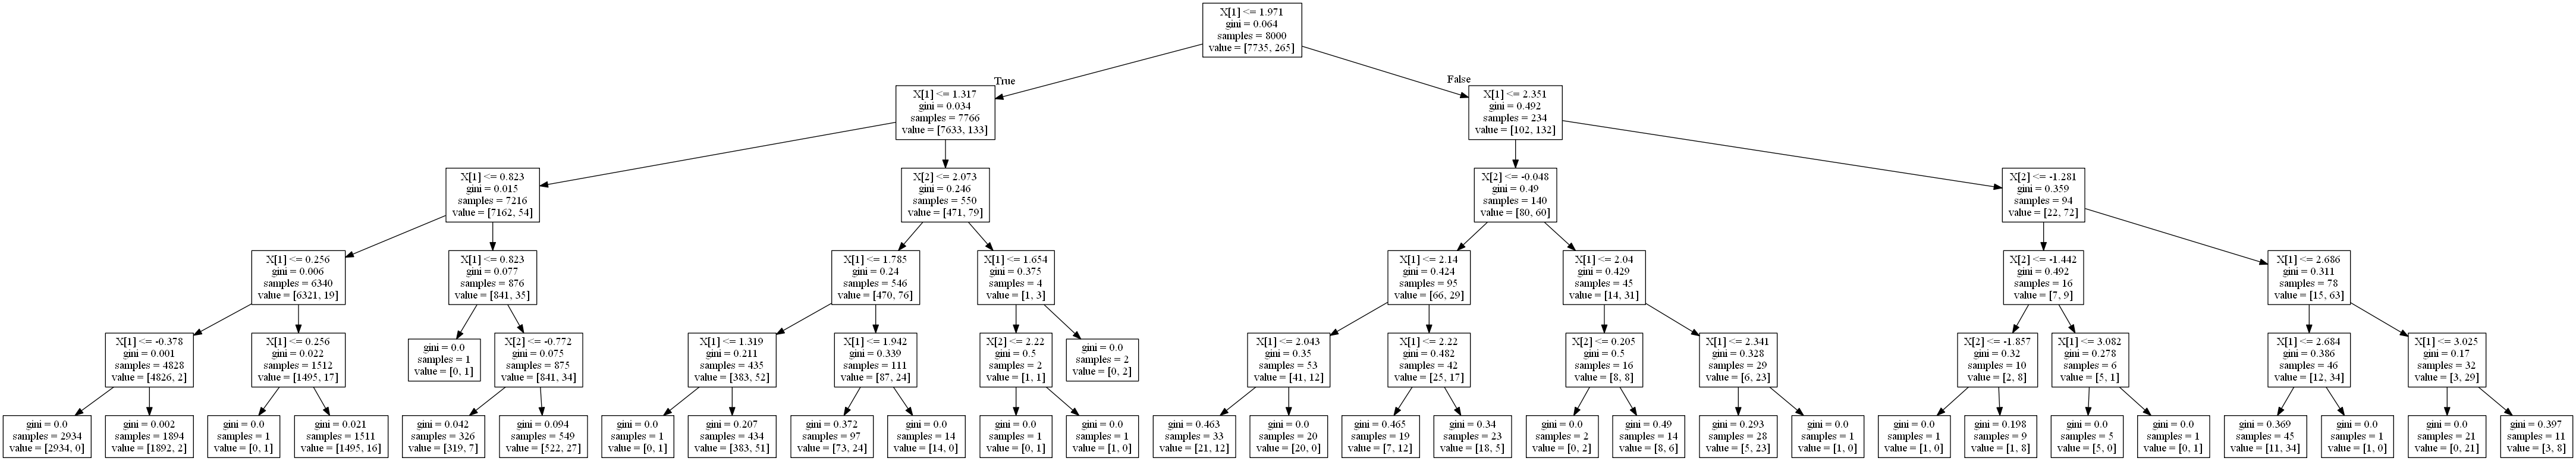

In [65]:
import sys
X = df_final[['student','balance','income']]
y = df_final['default']
# Scale columns for regression.
scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)



print(__doc__)


%matplotlib inline


# Fit regression model
regr = DecisionTreeClassifier(max_depth=5)
regr.fit(X_train, y_train)


# Predict

y = regr.predict(X_test)

dt=DecisionTreeRegressor(max_depth=5)
visualize_tree(regr, feature_names=['x'])

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)
        
dot_data=export_graphviz(regr, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
conda_fix(graph)
Image(graph.create_png())

Area under the ROC curve : 0.954498


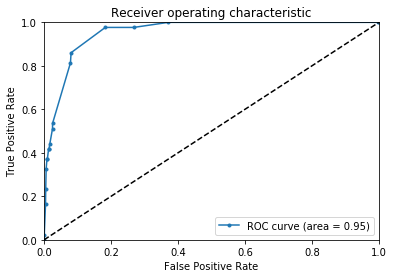

In [56]:
#plot Roc
plt.figure(figsize=(10,10))
y = df_final['default']
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth=5)

    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

optimal depth is 3


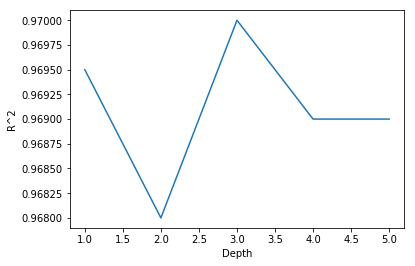

In [57]:
# Fit regression model
from sklearn.model_selection import train_test_split
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,6)
for n in depths:
    regr = DecisionTreeClassifier(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]
print ("optimal depth is" , n_opt)

Area under the ROC curve : 0.951562


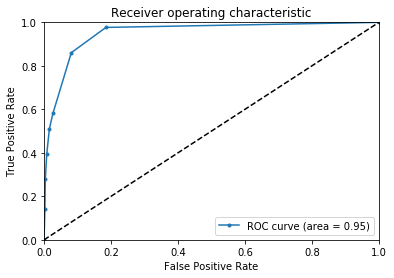

In [58]:
X = df_final[['student','balance','income']]
y = df_final['default']



# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth=3)

    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

From the Roc curve, we can find that with the optimal depth the AOC value is 0.95. A little bit less than the logistic regression.